In [1]:
!pip install pandas-profiling xgboost gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 947.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 747.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [3]:
!wget https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip

--2024-05-07 08:31:12--  https://github.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/raw/main/Loan_Prediction.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/main/Loan_Prediction.zip [following]
--2024-05-07 08:31:12--  https://raw.githubusercontent.com/Refactory-Capstone-Project/Loan-default-prediction-challenge-/main/Loan_Prediction.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1627991 (1.6M) [application/zip]
Saving to: ‘Loan_Prediction.zip’

Loan_Prediction.zip 100%[===================>]   1.55M  --.

In [4]:
!unzip /content/Loan_Prediction.zip

Archive:  /content/Loan_Prediction.zip
  inflating: SampleSubmission.csv    
  inflating: testdemographics.csv    
  inflating: testperf.csv            
  inflating: testprevloans.csv       
  inflating: traindemographics.csv   
  inflating: trainperf.csv           
  inflating: trainprevloans.csv      


# Demographic data (traindemographics.csv)

In [ ]:
train_demo = pd.read_csv("/content/traindemographics.csv")
train_demo.head()

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858efd5ca70688015cabd1f1e94b55  1991-07-19 00:00:00.000000   
4  8a858e785acd3412015acd48f4920d04  1982-11-22 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       3.362850      6.642485           GT Bank   
4           Savings       8.455332     11.971410           GT Bank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN  
1                 NaN                 Permanent                        NaN  
2                 NaN                       NaN                        NaN  
3                 NaN                 Permanent                        NaN  
4                 NaN                 Permanent                        NaN

In [ ]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [ ]:
train_demo.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [ ]:
train_demo[train_demo['customerid'].duplicated(keep=False)].sort_values('customerid')

customerid                   birthdate  \
1414  8a858e625c8d993a015c938f829f77ee  1988-12-20 00:00:00.000000   
1928  8a858e625c8d993a015c938f829f77ee  1988-12-20 00:00:00.000000   
445   8a858e6c5c88d145015c8b9627cd5a48  1979-09-30 00:00:00.000000   
1090  8a858e6c5c88d145015c8b9627cd5a48  1979-09-30 00:00:00.000000   
1996  8a858ec65cc6352b015cc64525ea0763  1985-01-30 00:00:00.000000   
1520  8a858ec65cc6352b015cc64525ea0763  1985-01-30 00:00:00.000000   
272   8a858edd57f790040157ffe9b6ed3fbb  1988-01-18 00:00:00.000000   
517   8a858edd57f790040157ffe9b6ed3fbb  1988-01-18 00:00:00.000000   
4126  8a858f1e5baffcc9015bb02b505f180d  1983-04-06 00:00:00.000000   
3021  8a858f1e5baffcc9015bb02b505f180d  1983-04-06 00:00:00.000000   
4115  8a858f1e5cc4bc81015cc548e1eb5206  1979-09-15 00:00:00.000000   
4266  8a858f1e5cc4bc81015cc548e1eb5206  1979-09-15 00:00:00.000000   
750   8a858f965bb63a25015bbf63fd062e2e  1974-02-25 00:00:00.000000   
776   8a858f965bb63a25015bbf63fd062e2e  1974-02-25 00:00:00.000000   
4286  8a858f9f5679951a01567a5b90644817  1984-12-17 00:00:00.000000   
3546  8a858f9f5679951a01567a5b90644817  1984-12-17 00:00:00.000000   
1188  8a858fc75cd62882015cdaf2f4311b3f  1975-10-27 00:00:00.000000   
798   8a858fc75cd62882015cdaf2f4311b3f  1975-10-27 00:00:00.000000   
159   8a858fca5c35df2c015c39ad8695343e  1980-11-26 00:00:00.000000   
138   8a858fca5c35df2c015c39ad8695343e  1980-11-26 00:00:00.000000   
1338  8a858fe05d421ff4015d4c87d2a21ceb  1983-01-20 00:00:00.000000   
1480  8a858fe05d421ff4015d4c87d2a21ceb  1983-01-20 00:00:00.000000   
1015  8a858fe65675195a015679452588279c  1982-08-01 00:00:00.000000   
1010  8a858fe65675195a015679452588279c  1982-08-01 00:00:00.000000   

     bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
1414           Savings       5.768333      5.561992        First Bank   
1928           Savings       5.768333      5.561992        First Bank   
445            Savings       3.367008      6.497313     Sterling Bank   
1090           Savings       3.367008      6.497313     Sterling Bank   
1996           Savings       3.845728      7.411737           GT Bank   
1520           Savings       3.845728      7.411737           GT Bank   
272              Other       3.782563      7.171356        First Bank   
517              Other       3.782563      7.171356        First Bank   
4126           Savings       6.969350      4.818535           GT Bank   
3021           Savings       6.969350      4.818535           GT Bank   
4115           Savings       6.285242      4.922719               UBA   
4266           Savings       6.285242      4.922719               UBA   
750            Savings       3.936366      6.817958      Stanbic IBTC   
776            Savings       3.936366      6.817958      Stanbic IBTC   
4286           Savings       4.196662     12.429509       Access Bank   
3546           Savings       4.196662     12.429509       Access Bank   
1188           Savings       7.437607      9.088935           GT Bank   
798            Savings       7.437607      9.088935           GT Bank   
159            Savings       3.352588      7.211089           GT Bank   
138            Savings       3.352588      7.211089           GT Bank   
1338           Savings       8.526960     12.023015         Skye Bank   
1480           Savings       8.526960     12.023015         Skye Bank   
1015           Savings       7.533646      9.046885               UBA   
1010           Savings       7.533646      9.046885               UBA   

     bank_branch_clients employment_status_clients level_of_education_clients  
1414                 NaN                 Permanent                        NaN  
1928                 NaN                 Permanent                        NaN  
445                  NaN                 Permanent                        NaN  
1090                 NaN                 Permanent                        NaN  
1996                 NaN                 Permanent 

In [ ]:
train_demo = train_demo.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])

train_demo["birthdate_year"] = pd.to_datetime(train_demo["birthdate"]).dt.year
train_demo["birthdate_month"] = pd.to_datetime(train_demo["birthdate"]).dt.month
train_demo["birthdate_day"] = pd.to_datetime(train_demo["birthdate"]).dt.day
train_demo.dtypes

<ipython-input-55-8093a667bca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo['birthdate'] = pd.to_datetime(train_demo['birthdate'])
<ipython-input-55-8093a667bca6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_demo["birthdate_year"] = pd.to_datetime(train_demo["birthdate"]).dt.year
<ipython-input-55-8093a667bca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

customerid                            object
birthdate                     datetime64[ns]
bank_account_type                     object
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
birthdate_year                         int32
birthdate_month                        int32
birthdate_day                          int32
dtype: object

In [ ]:
train_demo['bank_account_type'].value_counts()

bank_account_type
Savings    3414
Other       864
Current      56
Name: count, dtype: int64

In [ ]:
encoder = LabelEncoder()
train_demo['bank_account_type'] = encoder.fit_transform(train_demo['bank_account_type'])
train_demo[['bank_account_type']]

bank_account_type
0                     2
1                     2
2                     2
3                     2
4                     2
...                 ...
4341                  1
4342                  2
4343                  2
4344                  2
4345                  2

[4334 rows x 1 columns]

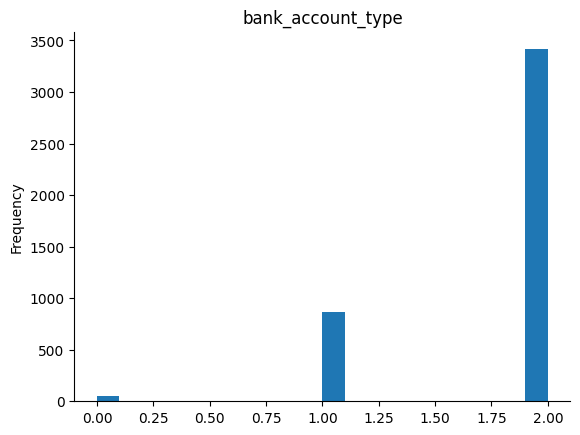

In [ ]:

train_demo['bank_account_type'].plot(kind='hist', bins=20, title='bank_account_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Based off of the graph. We can see that Savings is represented by '2', Other is represented by '1' and Current is represented by 0

In [ ]:
train_demo['longitude_gps'].describe()


count    4334.000000
mean        4.624000
std         7.194031
min      -118.247009
25%         3.354857
50%         3.591668
75%         6.543691
max       151.209290
Name: longitude_gps, dtype: float64

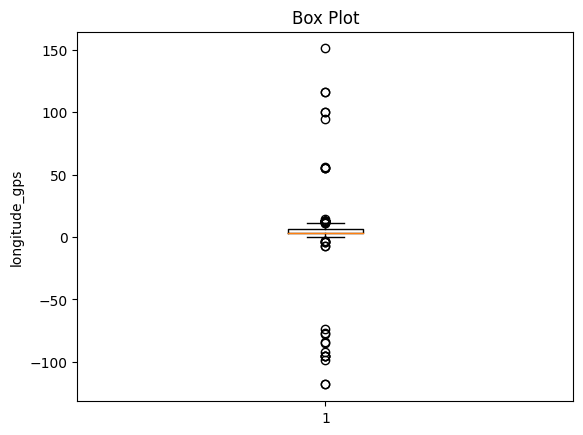

In [ ]:
train_demo['longitude_gps'] = train_demo['longitude_gps'].astype(float)
plt.boxplot(train_demo['longitude_gps'])
plt.title('Box Plot')
plt.ylabel('longitude_gps')
plt.show()

The Box plot shows the column has many outliers and they can be replaced with zero

In [ ]:
train_demo["longitude_gps"] = train_demo["longitude_gps"] \
                                .where(train_demo["longitude_gps"] < 20)\
                                .where(train_demo["longitude_gps"] > -20)

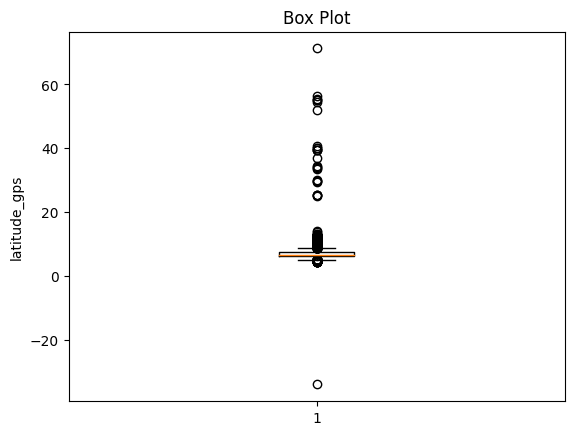

In [ ]:
train_demo['latitude_gps'] = train_demo['latitude_gps'].astype(float)
plt.boxplot(train_demo['latitude_gps'])
plt.title('Box Plot')
plt.ylabel('latitude_gps')
plt.show()

In [ ]:
train_demo["latitude_gps"] = train_demo["latitude_gps"] \
                                .where(train_demo["latitude_gps"] < 20)\
                                .where(train_demo["latitude_gps"] > -20)

In [ ]:
train_demo['bank_branch_clients'].info()

<class 'pandas.core.series.Series'>
Index: 4334 entries, 0 to 4345
Series name: bank_branch_clients
Non-Null Count  Dtype 
--------------  ----- 
51 non-null     object
dtypes: object(1)
memory usage: 67.7+ KB


In [ ]:
train_demo.drop(columns=['bank_branch_clients'], inplace=True)

In [ ]:
train_demo['employment_status_clients'].isnull().value_counts()

employment_status_clients
False    3686
True      648
Name: count, dtype: int64

There are 648 null values however dropping them will get rid of important data. The null values can be replaced by "Unknown"

In [ ]:
train_demo["employment_status_clients"]= train_demo["employment_status_clients"].fillna("Unknown")
train_demo["employment_status_clients"].value_counts()

employment_status_clients
Permanent        3134
Unknown           648
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

In [ ]:
train_demo["level_of_education_clients"].isnull().value_counts()

level_of_education_clients
True     3748
False     586
Name: count, dtype: int64

In [ ]:
train_demo["level_of_education_clients"]= train_demo["level_of_education_clients"].fillna("Unknown")
train_demo["level_of_education_clients"].value_counts()

level_of_education_clients
Unknown          3748
Graduate          420
Secondary          88
Post-Graduate      68
Primary            10
Name: count, dtype: int64

In [ ]:
demo_report = ProfileReport(train_demo)
demo_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Performance data (trainperf.csv)

This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer

In [ ]:
train_perf = pd.read_csv('/content/trainperf.csv')
train_perf.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [ ]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [ ]:
train_perf['customerid'].duplicated().sum()

0

In [ ]:
train_perf['approveddate'] = pd.to_datetime(train_perf['approveddate'])

train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate             object
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

In [ ]:
train_perf['creationdate'] = pd.to_datetime(train_perf['creationdate'])
train_perf.dtypes

customerid               object
systemloanid              int64
loannumber                int64
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int64
referredby               object
good_bad_flag            object
dtype: object

referredby column has null values and will need to be cleaned

In [ ]:
train_perf['referredby'].isnull().value_counts()

referredby
True     3781
False     587
Name: count, dtype: int64

In [ ]:
train_perf["referredby"]= train_perf["referredby"].fillna("Unknown")
train_perf["referredby"].value_counts()

referredby
Unknown                             3781
8a858fc55b2548dd015b286e452c678c       8
8a858f965bb63a25015bc2ddf2577416       3
8a858eeb5bb559d3015bb57fa13f10de       3
8a858e125b391784015b395fa56243e6       3
                                    ... 
8a858e3d5c3b5122015c43f776bd4a3a       1
8a858f7a5b39a003015b39ca67ab2efb       1
8a858fa359d61dae0159d698bf503d29       1
8a858e6f5cd5e874015ce084c86e2a87       1
8a858eda5c8863ff015c9dead65807bb       1
Name: count, Length: 522, dtype: int64

In [ ]:
train_perf["good_bad_flag"].value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

In [ ]:
encoder = LabelEncoder()
train_perf['good_bad_flag'] = encoder.fit_transform(train_perf['good_bad_flag'])
train_perf[['good_bad_flag']]

good_bad_flag
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
4363              0
4364              0
4365              0
4366              0
4367              0

[4368 rows x 1 columns]

In [ ]:
train_perf.head(5)

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18     15000.0   17250.0        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51     20000.0   22250.0        15   
3 2017-07-27 19:00:41 2017-07-27 18:00:35     10000.0   11500.0        15   
4 2017-07-03 23:42:45 2017-07-03 22:42:39     40000.0   44000.0        30   

  referredby  good_bad_flag  
0    Unknown              1  
1    Unknown              1  
2    Unknown              1  
3    Unknown              1  
4    Unknown              1

In [ ]:
performance_report = ProfileReport(train_perf)
performance_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Previous loans data (trainprevloans.csv)

This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

In [ ]:
train_prevloans = pd.read_csv('/content/trainprevloans.csv')
train_prevloans.head(5)

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49.000000        NaN   
2   23800.0        30  2017-04-26 22:18:56.000000        NaN   
3   11500.0        15  2017-04-24 01:35:52.000000        NaN   
4   11500.0        15  2017-07-14 21:18:43.000000        NaN   

                 firstduedate             firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

In [ ]:
train_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [ ]:
train_prevloans[train_prevloans['customerid'].duplicated(keep=False)].sort_values('customerid')

customerid  systemloanid  loannumber  \
16602  8a1a1e7e4f707f8b014f797718316cad     301947045           4   
5216   8a1a1e7e4f707f8b014f797718316cad     301620412           1   
17546  8a1a1e7e4f707f8b014f797718316cad     301632940           2   
7999   8a1a1e7e4f707f8b014f797718316cad     301916386           3   
12199  8a1a32fc49b632520149c3b8fdf85139     301937031           7   
...                                 ...           ...         ...   
18111  8a858fff5a36fe68015a3b8dcb8a3843     301852396           3   
7549   8a858fff5a36fe68015a3b8dcb8a3843     301951448           6   
10005  8a858fff5a36fe68015a3b8dcb8a3843     301873835           4   
7550   8a858fff5a36fe68015a3b8dcb8a3843     301830401           2   
17406  8a858fff5a36fe68015a3b8dcb8a3843     301914066           5   

                     approveddate                creationdate  loanamount  \
16602  2017-06-21 22:09:51.000000  2017-06-21 21:09:44.000000     30000.0   
5216   2016-05-13 15:29:37.000000  2016-05-13 14:29:31.000000     10000.0   
17546  2016-06-15 11:22:38.000000  2016-06-15 10:22:32.000000     10000.0   
7999   2017-05-23 14:21:42.000000  2017-05-23 13:20:30.000000     20000.0   
12199  2017-06-13 11:02:36.000000  2017-06-13 10:01:27.000000     20000.0   
...                           ...                         ...         ...   
18111  2017-04-02 13:49:34.000000  2017-04-02 12:49:27.000000     10000.0   
7549   2017-06-25 15:51:04.000000  2017-06-25 14:50:57.000000     20000.0   
10005  2017-04-19 20:22:37.000000  2017-04-19 19:22:30.000000     10000.0   
7550   2017-03-03 07:16:35.000000  2017-03-03 06:16:15.000000     10000.0   
17406  2017-05-20 09:52:31.000000  2017-05-20 08:51:24.000000     20000.0   

       totaldue  termdays                  closeddate referredby  \
16602   39000.0        60  2017-07-26 19:48:11.000000        NaN   
5216    13000.0        30  2016-06-15 00:03:33.000000        NaN   
17546   13000.0        30  2016-07-15 13:59:02.000000        NaN   
7999    24500.0        30  2017-06-21 21:58:00.000000        NaN   
12199   24500.0        30  2017-07-13 18:45:26.000000        NaN   
...         ...       ...                         ...        ...   
18111   11500.0        15  2017-04-17 13:03:52.000000        NaN   
7549    24500.0        30  2017-07-23 15:31:42.000000        NaN   
10005   11450.0        15  2017-04-21 21:45:31.000000        NaN   
7550    13000.0        30  2017-04-02 00:16:27.000000        NaN   
17406   24500.0        30  2017-06-19 20:07:18.000000        NaN   

                     firstduedate             firstrepaiddate  
16602  2017-07-21 00:00:00.000000  2017-07-20 15:05:33.000000  
5216   2016-06-13 00:00:00.000000  2016-06-14 10:41:13.000000  
17546  2016-07-15 00:00:00.000000  2016-07-15 13:43:58.000000  
7999   2017-06-22 00:00:00.000000  2017-06-21 21:47:51.000000  
12199  2017-07-13 00:00:00.000000  2017-07-13 18:35:18.000000  
...                           ...                         ...  
18111  2017-04-17 00:00:00.000000  2017-04-17 12:48:43.000000  
7549   2017-07-25 00:00:00.000000  2017-07-23 15:21:33.000000  
10005  2017-05-04 00:00:00.000000  2017-04-21 21:30:22.000000  
7550   2017-04-03 00:00:00.000000  2017-04-02 00:01:17.000000  
17406  2017-06-19 00:00:00.000000  2017-06-19 19:57:09.000000  

[16790 rows x 12 columns]

In [ ]:
train_prevloans = train_prevloans.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [ ]:
train_prevloans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 18181
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       4359 non-null   object 
 1   systemloanid     4359 non-null   int64  
 2   loannumber       4359 non-null   int64  
 3   approveddate     4359 non-null   object 
 4   creationdate     4359 non-null   object 
 5   loanamount       4359 non-null   float64
 6   totaldue         4359 non-null   float64
 7   termdays         4359 non-null   int64  
 8   closeddate       4359 non-null   object 
 9   referredby       587 non-null    object 
 10  firstduedate     4359 non-null   object 
 11  firstrepaiddate  4359 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 442.7+ KB


In [ ]:
train_prevloans['approveddate'] =pd.to_datetime(train_prevloans['approveddate'])
train_prevloans['creationdate'] =pd.to_datetime(train_prevloans['creationdate'])
train_prevloans['firstduedate'] =pd.to_datetime(train_prevloans['firstduedate'])
train_prevloans['firstrepaiddate'] =pd.to_datetime(train_prevloans['firstrepaiddate'])
train_prevloans['closeddate'] =pd.to_datetime(train_prevloans['closeddate'])
train_prevloans.dtypes

In [ ]:
train_prevloans['referredby'].isnull().value_counts()

referredby
True     3772
False     587
Name: count, dtype: int64

In [ ]:
train_prevloans["referredby"]= train_prevloans["referredby"].fillna("Unknown")
train_prevloans["referredby"].value_counts()

In [ ]:
prevloan_report = ProfileReport(train_prevloans)
prevloan_report

In [ ]:
#x_test = test_prevloans.drop('loanstatus', axis=1)
#y_test= test_prevloans['loanstatus']
#model.fit(x_train, y_train)
#y_predict=model.predict(x_test)
#accuracy = accuracy_score(y_test, y_predict)
#print(f'Accuracy: {accuracy}')

#print(classification_report(y_test, y_predict))


In [ ]:
#x_train = train_prevloans.drop('loanstatus', axis=1)
#y_train = train_prevloans['loanstatus']

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

TRYING OUT ANOTHER APPROACH

Merging all three files of the train set to handle them as one (Traindata.csv) as well as those of the test set into one file(Testdata.csv) other than handling them separately.

In [7]:
train_demo = pd.read_csv("/content/traindemographics.csv")
train_perf = pd.read_csv("/content/trainperf.csv")
train_prevloans = pd.read_csv("/content/trainprevloans.csv")



In [9]:
train_data = pd.merge(pd.merge(train_demo, train_perf, on='customerid'), train_prevloans, on='customerid')
print(train_data)

                             customerid                   birthdate  \
0      8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1      8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2      8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3      8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
4      8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
...                                 ...                         ...   
13688  8a858f155554552501555588ca2b3b40  1985-12-13 00:00:00.000000   
13689  8a858f155554552501555588ca2b3b40  1985-12-13 00:00:00.000000   
13690  8a858f155554552501555588ca2b3b40  1985-12-13 00:00:00.000000   
13691  8a858f155554552501555588ca2b3b40  1985-12-13 00:00:00.000000   
13692  8a858fc65cf978f4015cf97cee3a02ce  1982-07-01 00:00:00.000000   

      bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0               Savings       3.319219      6.528604           GT Bank   

In [14]:
train_data.info
train_data.dropna(inplace=True)
train_data.isnull().values.any()

False

In [15]:
train_data.drop_duplicates()

customerid                   birthdate  \
441    8a8589b953bc23f70153ccc3fd3519c7  1977-05-31 00:00:00.000000   
442    8a8589b953bc23f70153ccc3fd3519c7  1977-05-31 00:00:00.000000   
3763   8a858f475b8bd761015b8c03cb5920cf  1993-10-26 00:00:00.000000   
3764   8a858f475b8bd761015b8c03cb5920cf  1993-10-26 00:00:00.000000   
11913  8a6b87fe4d56512d014d57af446e7ad0  1972-12-02 00:00:00.000000   
13407  8a858f6a5a8a6734015a8ab389692db3  1979-10-01 00:00:00.000000   

      bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
441             Savings       4.523422      7.757938           GT Bank   
442             Savings       4.523422      7.757938           GT Bank   
3763            Savings       3.355625      6.637496              FCMB   
3764            Savings       3.355625      6.637496              FCMB   
11913           Current       3.419578      6.434245      Diamond Bank   
13407           Savings       3.191618      6.505456        First Bank   

      bank_branch_clients employment_status_clients  \
441            ABULE EGBA                 Permanent   
442            ABULE EGBA                 Permanent   
3763                AKUTE                 Permanent   
3764                AKUTE                 Permanent   
11913           LEKKI EPE                 Permanent   
13407              TINCAN                 Permanent   

      level_of_education_clients  systemloanid_x  ...  loannumber_y  \
441                     Graduate       301993240  ...             3   
442                     Graduate       301993240  ...             4   
3763                    Graduate       301989974  ...             2   
3764                    Graduate       301989974  ...             1   
11913                   Graduate       301985761  ...             1   
13407                  Secondary       301980076  ...             2   

                   approveddate_y              creationdate_y  loanamount_y  \
441    2017-05-05 11:29:05.000000  2017-05-05 10:28:42.000000       10000.0   
442    2017-06-02 08:35:19.000000  2017-06-02 07:35:11.000000       20000.0   
3763   2017-06-01 11:35:31.000000  2017-06-01 10:35:24.000000       10000.0   
3764   2017-05-12 10:20:22.000000  2017-05-12 09:20:08.000000       10000.0   
11913  2017-06-29 08:19:38.000000  2017-06-29 07:18:30.000000       10000.0   
13407  2017-06-16 15:24:37.000000  2017-06-16 14:23:28.000000       10000.0   

       totaldue_y  termdays_y                  closeddate  \
441       13000.0          30  2017-06-01 09:42:15.000000   
442       23000.0          30  2017-06-24 16:15:51.000000   
3763      13000.0          30  2017-07-21 19:37:00.000000   
3764      13000.0          30  2017-06-01 01:39:17.000000   
11913     11500.0          15  2017-07-12 16:01:10.000000   
13407     11500.0          15  2017-07-03 05:40:03.000000   

                           referredby_y                firstduedate  \
441    8a858f995bcdb303015bcdb8f52f0478  2017-06-05 00:00:00.000000   
442    8a858f995bcdb303015bcdb8f52f0478  2017-07-03 00:00:00.000000   
3763   8a858e2d5bb55d46015bc86b9e566836  2017-07-03 00:00:00.000000   
3764   8a858e2d5bb55d46015bc86b9e566836  2017-06-12 00:00:00.000000   
11913  8a858e495cef1ef1015cef8066103757  2017-07-17 00:00:00.000000   
13407  8a858e2d5bb55d46015bc86b9e566836  2017-07-03 00:00:00.000000   

                  firstrepaiddate  
441    2017-06-01 09:32:07.000000  
442    2017-06-24 16:05:42.000000  
3763   2017-07-21 19:26:52.000000  
3764   2017-06-01 01:29:07.000000  
11913  2017-07-12 15:51:01.000000  
13407  2017-07-03 04:09:22.000000  

[6 rows x 29 columns]

In [17]:
train_data.to_csv('traindata.csv')
print("traindata.csv")

traindata.csv


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 441 to 13407
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  6 non-null      object 
 1   birthdate                   6 non-null      object 
 2   bank_account_type           6 non-null      object 
 3   longitude_gps               6 non-null      float64
 4   latitude_gps                6 non-null      float64
 5   bank_name_clients           6 non-null      object 
 6   bank_branch_clients         6 non-null      object 
 7   employment_status_clients   6 non-null      object 
 8   level_of_education_clients  6 non-null      object 
 9   systemloanid_x              6 non-null      int64  
 10  loannumber_x                6 non-null      int64  
 11  approveddate_x              6 non-null      object 
 12  creationdate_x              6 non-null      object 
 13  loanamount_x                6 non-null

In [19]:
train_data = train_data.drop(['customerid', 'birthdate', 'approveddate_x', 'creationdate_x',
                  'approveddate_y', 'creationdate_y', 'closeddate', 'firstduedate',
                  'firstrepaiddate', 'referredby_x', 'referredby_y'], axis=1)

In [20]:
label_encoder = LabelEncoder()
train_data['bank_account_type'] = label_encoder.fit_transform(train_data['bank_account_type'])
train_data['bank_name_clients'] = label_encoder.fit_transform(train_data['bank_name_clients'])
train_data['bank_branch_clients'] = label_encoder.fit_transform(train_data['bank_branch_clients'])
train_data['employment_status_clients'] = label_encoder.fit_transform(train_data['employment_status_clients'])
train_data['level_of_education_clients'] = label_encoder.fit_transform(train_data['level_of_education_clients'])
train_data['good_bad_flag'] = label_encoder.fit_transform(train_data['good_bad_flag'])


In [21]:
x_train = train_data.drop('good_bad_flag', axis=1)
y_train = train_data['good_bad_flag']

In [22]:
test_demo = pd.read_csv("/content/testdemographics.csv")
test_perf = pd.read_csv("/content/testperf.csv")
test_prevloans = pd.read_csv("/content/testprevloans.csv")



In [23]:
test_data = pd.merge(pd.merge(test_demo, test_perf, on='customerid'), test_prevloans, on='customerid')
print(test_data)

                            customerid                   birthdate  \
0     8a858f305c8dd672015c93b1db645db4  1976-08-28 00:00:00.000000   
1     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
2     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
3     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
4     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
...                                ...                         ...   
1600  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1601  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1602  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1603  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1604  8a85881053bc33670153c79e8e84571a  1984-05-11 00:00:00.000000   

     bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0              Savings       5.296628      7.593965     Heritage Bank   
1            

In [24]:

train_data.dropna(inplace=True)
train_data.isnull().values.any()

False

In [25]:
test_data.drop_duplicates()

customerid                   birthdate  \
0     8a858f305c8dd672015c93b1db645db4  1976-08-28 00:00:00.000000   
1     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
2     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
3     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
4     8a858fde56eb02280156eb6dafc128ac  1982-03-29 00:00:00.000000   
...                                ...                         ...   
1600  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1601  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1602  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1603  8a858e675b00c831015b06776ce75e69  1975-04-07 00:00:00.000000   
1604  8a85881053bc33670153c79e8e84571a  1984-05-11 00:00:00.000000   

     bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0              Savings       5.296628      7.593965     Heritage Bank   
1              Savings       6.354624      4.949031        First Bank   
2              Savings       6.354624      4.949031        First Bank   
3              Savings       6.354624      4.949031        First Bank   
4              Savings       6.354624      4.949031        First Bank   
...                ...            ...           ...               ...   
1600           Savings       3.876507      7.367196               UBA   
1601           Savings       3.876507      7.367196               UBA   
1602           Savings       3.876507      7.367196               UBA   
1603           Savings       3.876507      7.367196               UBA   
1604           Savings       3.863840      7.442228        First Bank   

     bank_branch_clients employment_status_clients level_of_education_clients  \
0                    NaN                 Permanent                        NaN   
1                    NaN             Self-Employed                        NaN   
2                    NaN             Self-Employed                        NaN   
3                    NaN             Self-Employed                        NaN   
4                    NaN             Self-Employed                        NaN   
...                  ...                       ...                        ...   
1600                 NaN                 Permanent                        NaN   
1601                 NaN                 Permanent                        NaN   
1602                 NaN                 Permanent                        NaN   
1603                 NaN                 Permanent                        NaN   
1604                 NaN                 Permanent                   Graduate   

      systemloanid_x  ...  loannumber_y              approveddate_y  \
0          301992953  ...             1  2017-06-11 13:15:09.000000   
1          301997095  ...            10  2017-03-09 22:21:00.000000   
2          301997095  ...            12  2017-05-16 18:17:15.000000   
3          301997095  ...             7  2016-11-16 08:46:32.000000   
4          301997095  ...             6  2016-11-05 08:43:39.000000   
...              ...  ...           ...                         ...   
1600       301996981  ...             1  2017-03-25 18:36:20.000000   
1601       301996981  ...             2  2017-04-27 11:04:00.000000   
1602       301996981  ...             3  2017-06-07 10:33:54.000000   
1603       301996981  ...             4  2017-06-24 07:37:33.000000   
1604       301978031  ...             1  2016-03-30 14:12:08.000000   

                  creationdate_y  loanamount_y  totaldue_y  termdays_y  \
0     2017-06-11 12:14:02.000000       10000.0     13000.0          30   
1     2017-03-09 21:20:53.000000       40000.0     44800.0          30   
2     2017-05-16 17:17:08.000000       40000.0     44000.0          30   
3     2016-11-16 07:46:22.000000       30000.0     34400.0          30   
4     2016-11-05 07:43:29.000000       30000.0     32250.0          15   
...                          ...        

In [27]:
test_data.to_csv('testdata.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1605 non-null   object 
 1   birthdate                   1605 non-null   object 
 2   bank_account_type           1605 non-null   object 
 3   longitude_gps               1605 non-null   float64
 4   latitude_gps                1605 non-null   float64
 5   bank_name_clients           1605 non-null   object 
 6   bank_branch_clients         18 non-null     object 
 7   employment_status_clients   1459 non-null   object 
 8   level_of_education_clients  385 non-null    object 
 9   systemloanid_x              1605 non-null   int64  
 10  loannumber_x                1605 non-null   int64  
 11  approveddate_x              1605 non-null   object 
 12  creationdate_x              1605 non-null   object 
 13  loanamount_x                1605 

In [30]:
test_data['bank_account_type'] = label_encoder.fit_transform(test_data['bank_account_type'])
test_data['bank_name_clients'] = label_encoder.fit_transform(test_data['bank_name_clients'])
test_data['bank_branch_clients'] = label_encoder.fit_transform(test_data['bank_branch_clients'])
test_data['employment_status_clients'] = label_encoder.fit_transform(test_data['employment_status_clients'])
test_data['level_of_education_clients'] = label_encoder.fit_transform(test_data['level_of_education_clients'])

In [34]:
test_data['good_bad_flag'] = 0
test_data.to_csv('testdata.csv', index=False)

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_account_type           1605 non-null   int64  
 1   longitude_gps               1605 non-null   float64
 2   latitude_gps                1605 non-null   float64
 3   bank_name_clients           1605 non-null   int64  
 4   bank_branch_clients         1605 non-null   int64  
 5   employment_status_clients   1605 non-null   int64  
 6   level_of_education_clients  1605 non-null   int64  
 7   systemloanid_x              1605 non-null   int64  
 8   loannumber_x                1605 non-null   int64  
 9   loanamount_x                1605 non-null   int64  
 10  totaldue_x                  1605 non-null   float64
 11  termdays_x                  1605 non-null   int64  
 12  systemloanid_y              1605 non-null   int64  
 13  loannumber_y                1605 

In [36]:
x_test = test_data.drop('good_bad_flag', axis=1)
y_test = test_data['good_bad_flag']

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#training the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_scaled, y_train)

#making a prediction
y_pred = logreg.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1605
           1       0.00      0.00      0.00         0

    accuracy                           0.72      1605
   macro avg       0.50      0.36      0.42      1605
weighted avg       1.00      0.72      0.84      1605



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_pred_binary = (y_pred > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1605
           1       0.00      0.00      0.00         0

    accuracy                           0.72      1605
   macro avg       0.50      0.36      0.42      1605
weighted avg       1.00      0.72      0.84      1605



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7233644859813084


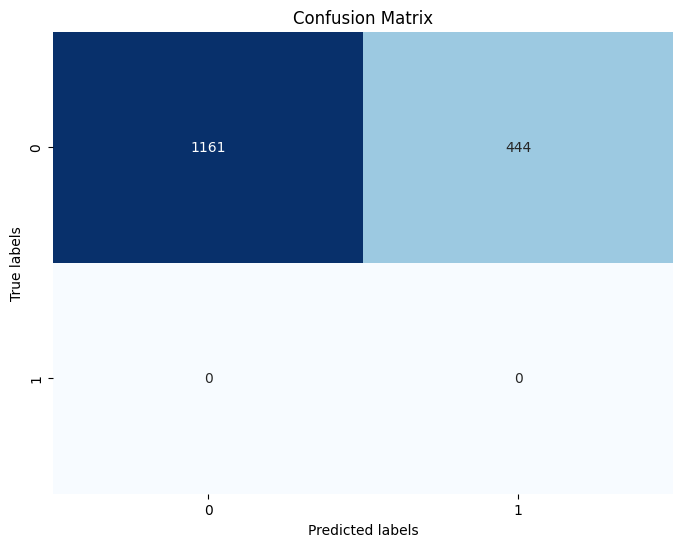

In [49]:
#creating and plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
output = pd.DataFrame({'customerid': x_test['customerid'], 'good_bad_flag': y_pred_binary})


KeyError: 'customerid'